## Inicialización

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math 
import seaborn as sns


## Cargar datos

In [2]:
Calls = pd.read_csv('datasets/megaline_calls.csv') 
Internet = pd.read_csv('datasets/megaline_internet.csv')
Message = pd.read_csv('datasets/megaline_messages.csv')
Plans = pd.read_csv('datasets/megaline_plans.csv')
Users = pd.read_csv('datasets/megaline_users.csv')

## Preparar los datos

In [ ]:
print(Calls.info())

print(Internet.info())

print(Message.info())

print(Plans.info())

print(Users.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null 

## Tarifas

In [ ]:
Plans.describe()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [ ]:
Plans.sample(5, replace=True)



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


Nos dan los megabytes que incluye el paquete, seria bueno transformalos a Gigabytes para poder manipularlos como necesitemos, en la tabla de internet y mensajes tenemos floats por lo cual no hay que hacer correciones como tal pero si modificar la columna de "usd_per_gb"y pasarla de entero a float.

## 1.5 Corregir datos

In [6]:
Plans['gb_per_month_included'] = Plans['mb_per_month_included'] / 1024
Plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Enriquecer los datos

In [7]:
Plans['usd_per_gb'] = Plans['usd_per_gb'].astype(float)
Plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(4), int64(4), object(1)
memory usage: 276.0+ bytes


## Usuarios/as

In [8]:
Users.describe()# Imprime la información general/resumida sobre el DataFrame de usuarios



,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [ ]:
Users.sample(5, replace= True)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
112,1112,Amal,Pacheco,18,"Grand Rapids-Kentwood, MI MSA",2018-10-08,ultimate,NaN
145,1145,Venice,Brooks,29,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-12,surf,NaN
344,1344,Hugo,Daugherty,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-25,surf,NaN
285,1285,Joesph,Barry,28,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-08-03,surf,NaN
383,1383,Margarito,Mccoy,52,"Tampa-St. Petersburg-Clearwater, FL MSA",2018-10-10,ultimate,NaN


Tenemos que cambiar el tipo de dato de la columna "reg_date" que es un "object" por un "datatime".  

### Corrección de los datos

In [10]:
Users['reg_date'] = pd.to_datetime(Users['reg_date'])
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Enriquecer los datos

agregaremos una columna agrupando los meses en los que se unieron los usuarios.

In [11]:
Users['join_month'] = Users['reg_date'].dt.month
Users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,join_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,5


## Llamadas

In [12]:
Calls.describe()# Imprime la información general/resumida sobre el DataFrame de las llamadas



,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [13]:
Calls.head()# Imprime una muestra de datos para las llamadas



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Pese a parecer que los datos estan correctos, si checamos en la info, podemos ver que los datos de la fecha estan en 'int', por lo que sera mejoir cambiarlo a dato 'datetime' y asi poder completar la informacion por mes que necesitamos de nuestros clientes.

### Corregir los datos

Corregir la misma columna de los meses y pasarla de "int" a "datatime" 

In [14]:
Calls['call_date'] = pd.to_datetime(Calls['call_date'])
Calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

Agregaremos un columna que indique los meses y ocuparlo mas facil despues.

In [15]:
Calls['month'] = Calls['call_date'].dt.month
Calls.sample(5, replace=True)

,id,user_id,call_date,duration,month
127804,1458_121,1458,2018-11-04,13.35,11
50003,1181_272,1181,2018-07-30,5.73,7
117414,1411_6,1411,2018-11-30,5.96,11
95466,1338_280,1338,2018-12-28,0.30,12
118276,1412_560,1412,2018-10-10,3.47,10


## Mensajes

In [ ]:
Message.describe()



,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [ ]:
Message.head()



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Corregir la misma columna de los meses y pasarla de "int" a "datatime" y agregaremos un columna que indique los meses y ocuparlo mas facil despues.

### Corregir los datos

In [18]:
Message['message_date'] =pd.to_datetime(Message['message_date'])
Message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

In [19]:
Message['month'] = Message['message_date'].dt.month
Message.sample(5,replace=True)

,id,user_id,message_date,month
52233,1336_188,1336,2018-08-02,8
47156,1320_400,1320,2018-09-21,9
72599,1470_227,1470,2018-12-17,12
63862,1407_95,1407,2018-12-09,12
15744,1103_108,1103,2018-12-14,12


## Internet

In [ ]:
Internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [ ]:
Internet.sample(5, replace=True)

,id,user_id,session_date,mb_used
17945,1081_0,1081,2018-09-23,0.00
17605,1079_210,1079,2018-09-24,4.44
8763,1046_48,1046,2018-07-26,56.06
41843,1187_20,1187,2018-04-26,123.05
9300,1048_218,1048,2018-08-29,624.84


para que haya una buena razon de haber creado la columna de mes en los anteriores en este tambien cambiaremos la fecha para que podeamos manejarla como necesitamos y crearemos la columna de "month" para poder unirlos en un nuevo data frame, aparte de eso tranformaremos los MB a GB ya que se nos esat pidiendo el resultado en GB.

### Corregir los datos

In [22]:
Internet['session_date'] = pd.to_datetime(Internet['session_date'])
Internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

In [23]:
Internet['month'] = Internet['session_date'].dt.month
Internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


## Estudiar las condiciones de las tarifas

In [ ]:

Plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10.0,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7.0,0.01,0.01,ultimate,30.0


## Agregar datos por usuario para tener un mejor entendimiento del proceso



In [ ]:
call_per_user = Calls.groupby(['user_id','month'])['duration'].count().rename('calls_made').reset_index()
call_per_user.head()


,user_id,month,calls_made
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [ ]:
Calls['duration_rounded'] = Calls['duration'].apply(math.ceil)
call_minute_per_user = Calls.groupby(['user_id','month'])['duration'].sum().reset_index()
call_minute_per_user.head()

call_minute_per_user_rounded = Calls.groupby(['user_id','month'])['duration_rounded'].sum().reset_index()
call_minute_per_user_rounded = call_minute_per_user_rounded.rename(columns={'duration_rounded': 'total_minutes'})
call_minute_per_user_rounded.head()


,user_id,month,total_minutes
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


In [ ]:
message_per_user = Message.groupby(['user_id','month'])['id'].count().rename("count_ms").reset_index()
message_per_user.head() 



,user_id,month,count_ms
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [ ]:
internet_x_user = Internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
internet_x_user['gb_used_rounded'] = internet_x_user['mb_used'].apply(lambda x: math.ceil(x / 1024))
internet_gb_per_user_rounded = internet_x_user[['user_id', 'month', 'gb_used_rounded']].rename(columns={'gb_used_rounded': 'total_gb'})
internet_gb_per_user_rounded.head()



,user_id,month,total_gb
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19


ya he corregido y redondeado las llamadas y los gb, en la siguiente tabla ya esta limpio 

In [ ]:
monthly_users = call_per_user.merge(call_minute_per_user_rounded,on=['user_id','month'],how='outer')
monthly_users = monthly_users.merge(message_per_user,on=['user_id','month'],how='outer')
monthly_users = monthly_users.merge(internet_gb_per_user_rounded,on=['user_id','month'],how='outer')
monthly_users.head()

,user_id,month,calls_made,total_minutes,count_ms,total_gb
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0


In [30]:
Users_Plan = Users[["user_id", "plan","city"]]

In [ ]:
monthly_users = monthly_users.merge(Users_Plan,on='user_id',how='outer')
monthly_users
monthly_users.head()


,user_id,month,calls_made,total_minutes,count_ms,total_gb,plan,city
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,27.0,182.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,49.0,315.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,65.0,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,64.0,426.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"


In [32]:
monthly_users.rename(columns={'plan':'plan_name'}, inplace=True)

In [33]:
monthly_users = monthly_users.merge(Plans, on=['plan_name'], how='outer')

In [34]:
monthly_users.head()

,user_id,month,calls_made,total_minutes,count_ms,total_gb,plan_name,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1001,8.0,27.0,182.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10.0,0.03,0.03,15.0
1,1001,9.0,49.0,315.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10.0,0.03,0.03,15.0
2,1001,10.0,65.0,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10.0,0.03,0.03,15.0
3,1001,11.0,64.0,426.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10.0,0.03,0.03,15.0
4,1001,12.0,56.0,412.0,44.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10.0,0.03,0.03,15.0


In [35]:
monthly_users['llamadas_valido'] = np.maximum(monthly_users['total_minutes'] - (monthly_users['minutes_included']),0)
monthly_users['mensajes_valido'] = (monthly_users['count_ms'] - monthly_users['messages_included']).clip(lower = 0)
monthly_users['internet_valido'] = (monthly_users['total_gb'] - monthly_users['gb_per_month_included']).clip(lower = 0)# Calcula el ingreso mensual para cada usuario

In [36]:
monthly_users.head()

,user_id,month,calls_made,total_minutes,count_ms,total_gb,plan_name,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,llamadas_valido,mensajes_valido,internet_valido
0,1001,8.0,27.0,182.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10.0,0.03,0.03,15.0,0.0,0.0,0.0
1,1001,9.0,49.0,315.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10.0,0.03,0.03,15.0,0.0,0.0,0.0
2,1001,10.0,65.0,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10.0,0.03,0.03,15.0,0.0,3.0,7.0
3,1001,11.0,64.0,426.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10.0,0.03,0.03,15.0,0.0,0.0,4.0
4,1001,12.0,56.0,412.0,44.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10.0,0.03,0.03,15.0,0.0,0.0,4.0


In [37]:
monthly_users['revenue'] = monthly_users['usd_monthly_pay'] + (monthly_users['llamadas_valido'] * monthly_users['usd_per_minute']) + (monthly_users['mensajes_valido'] * monthly_users['usd_per_message']) + (monthly_users['internet_valido'] * monthly_users['usd_per_gb'])

In [38]:
monthly_users.head()

,user_id,month,calls_made,total_minutes,count_ms,total_gb,plan_name,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,llamadas_valido,mensajes_valido,internet_valido,revenue
0,1001,8.0,27.0,182.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10.0,0.03,0.03,15.0,0.0,0.0,0.0,20.00
1,1001,9.0,49.0,315.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10.0,0.03,0.03,15.0,0.0,0.0,0.0,20.00
2,1001,10.0,65.0,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10.0,0.03,0.03,15.0,0.0,3.0,7.0,90.09
3,1001,11.0,64.0,426.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10.0,0.03,0.03,15.0,0.0,0.0,4.0,60.00
4,1001,12.0,56.0,412.0,44.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10.0,0.03,0.03,15.0,0.0,0.0,4.0,60.00


## Estudia el comportamiento de usuario

### Llamadas

<Axes: xlabel='Meses', ylabel='Promedio llamadas'>

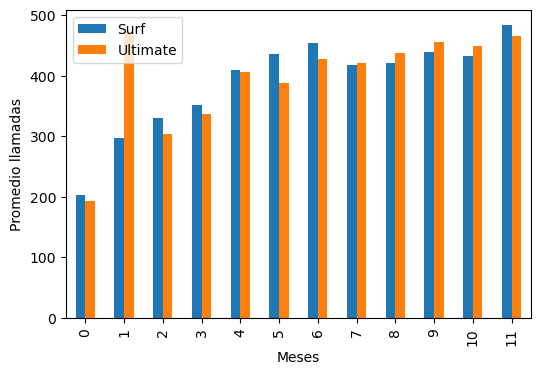

In [39]:
Mean_calls = monthly_users.groupby(['plan_name','month'])['total_minutes'].mean().reset_index()

surf_data = Mean_calls[Mean_calls['plan_name'] == 'surf']
ultimate_data = Mean_calls[Mean_calls['plan_name'] == 'ultimate']

comparacion_llamadas = pd.DataFrame({
    'Surf': surf_data['total_minutes'].values,
    'Ultimate' : ultimate_data['total_minutes'].values
}) 

comparacion_llamadas.plot(kind='bar',figsize=[6 ,4] ,xlabel='Meses' ,ylabel='Promedio llamadas' )
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.


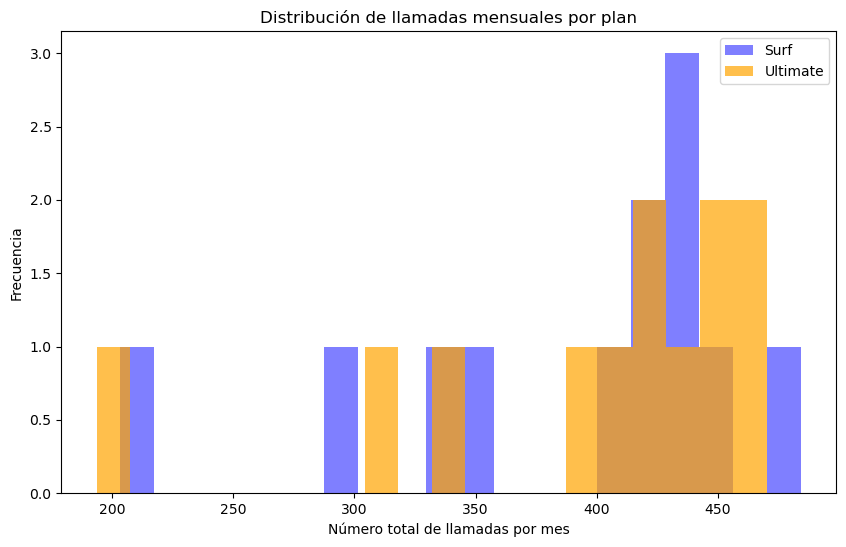

In [40]:
minutes_call = monthly_users.groupby(['plan_name','month'])['total_minutes'].mean().reset_index()

surf_data = minutes_call[minutes_call['plan_name'] == 'surf']
ultimate_data = minutes_call[minutes_call['plan_name'] == 'ultimate']

comparacion_min_mens = pd.DataFrame({
    'Surf': surf_data['total_minutes'].values,
    'Ultimate' : ultimate_data['total_minutes'].values
}) 

plt.figure(figsize=(10, 6))
plt.hist(surf_data['total_minutes'], bins=20, alpha=0.5, label='Surf', color='blue')
plt.hist(ultimate_data['total_minutes'], bins=20, alpha=0.7, label='Ultimate', color='orange')
plt.xlabel('Número total de llamadas por mes')
plt.ylabel('Frecuencia')
plt.title('Distribución de llamadas mensuales por plan')
plt.legend()
plt.show()
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.



In [41]:
media_surf = surf_data['total_minutes'].mean()# Calcula la media y la varianza de la duración mensual de llamadas.
media_ultimate = ultimate_data['total_minutes'].mean()

varianza_surf = np.var(surf_data['total_minutes'])
varianza_ultimate = np.var(ultimate_data['total_minutes'])
print (f'La media de Surf en llamadas  es {media_surf} y la varianza es {varianza_surf}')
print (f'La media de Ultimate en llamadas es {media_ultimate} y la varianza es {varianza_ultimate}')

La media de Surf en llamadas  es 389.6562177301583 y la varianza es 5843.400883711428
La media de Ultimate en llamadas es 396.13856827549125 y la varianza es 6085.24696027484


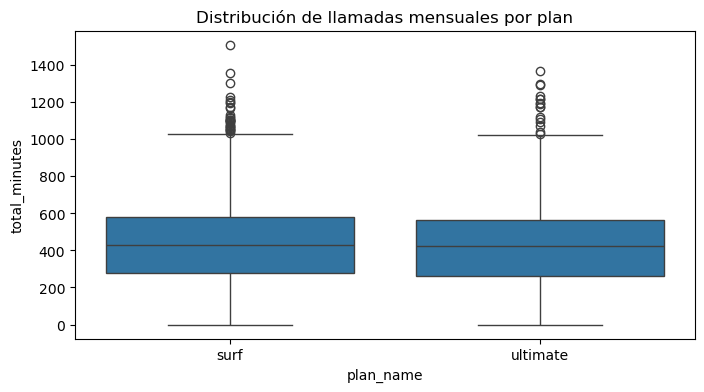

In [42]:

plt.figure(figsize=(8, 4))
sns.boxplot(data=monthly_users, x='plan_name', y='total_minutes')
plt.title('Distribución de llamadas mensuales por plan')
plt.show()# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas



no varia tanto a simple vista en relacion a las llamadas  [Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

### Mensajes

<Axes: xlabel='Meses', ylabel='Promedio Mensajes'>

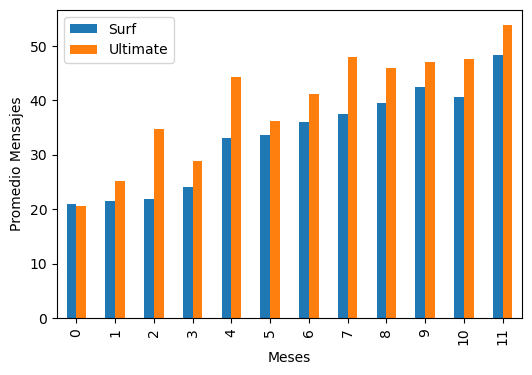

In [43]:

mean_mns = monthly_users.groupby(['plan_name','month'])['count_ms'].mean().reset_index()# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

surf_mns = mean_mns[mean_mns['plan_name'] == 'surf']
ultimate_mns = mean_mns[mean_mns['plan_name'] == 'ultimate']

comparacion_mensajes = pd.DataFrame({
    'Surf': surf_mns['count_ms'].values,
    'Ultimate' : ultimate_mns['count_ms'].values
}) 
comparacion_mensajes.plot(kind='bar',figsize=[6 ,4] ,xlabel='Meses' ,ylabel='Promedio Mensajes' )


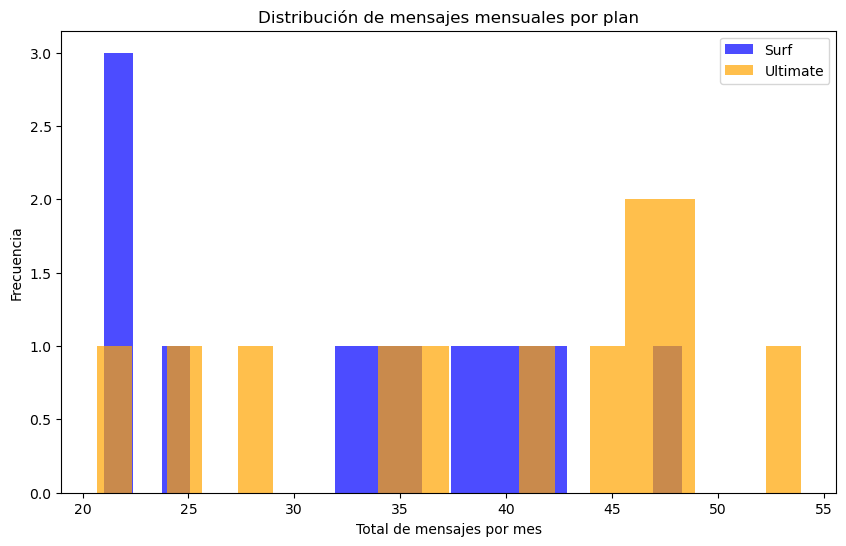

In [44]:
sum_mns = monthly_users.groupby(['plan_name','month'])['count_ms'].mean().reset_index()

dt_surf = sum_mns[sum_mns['plan_name'] == 'surf']
dt_ultimate= sum_mns[sum_mns['plan_name'] == 'ultimate']

comp_sum_mns = pd.DataFrame({
    'Surf': dt_surf['count_ms'].values,
    'Ultimate' : dt_ultimate['count_ms'].values
}) 

plt.figure(figsize=(10, 6))
plt.hist(dt_surf['count_ms'], bins=20, alpha=0.7, label='Surf', color='blue')
plt.hist(dt_ultimate['count_ms'], bins=20, alpha=0.7, label='Ultimate', color='orange')
plt.xlabel('Total de mensajes por mes')
plt.ylabel('Frecuencia')
plt.title('Distribución de mensajes mensuales por plan')
plt.legend()
plt.show()

In [45]:
media_surf_mns= dt_surf['count_ms'].mean()
media_ultimate_mns = dt_ultimate['count_ms'].mean()

varianza_surf_mns = np.var(dt_surf['count_ms'])
varianza_ultimate_mns = np.var(dt_ultimate['count_ms'])
print (f'La media de Surf en mensajes es {media_surf_mns} y la varianza es {varianza_surf_mns}')
print (f'La media de Ultimate en mensajes es {media_ultimate_mns} y la varianza es {varianza_ultimate_mns}')

La media de Surf en mensajes es 33.30976679539808 y la varianza es 77.24233718034748
La media de Ultimate en mensajes es 39.47232523405716 y la varianza es 97.7674119431319


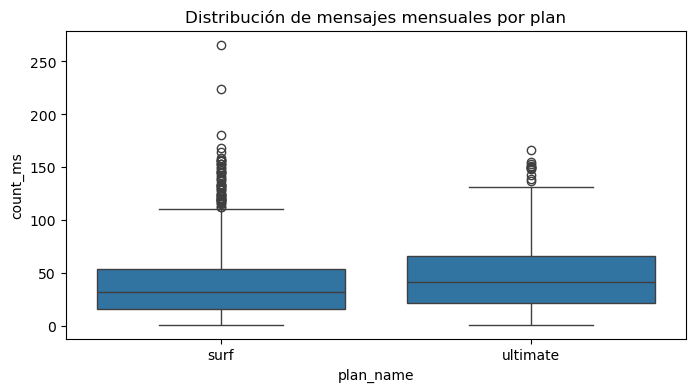

In [46]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=monthly_users, x='plan_name', y='count_ms')
plt.title('Distribución de mensajes mensuales por plan')
plt.show()

Tomando en cuenta los mensajes de ambos planes, es correcto decir que el comportamiento varia y es mas creciente en el plan Surf que en el plan Ultimate, de este plan casi no hay tantos mensajes como en el "surf", en este plan hasta se pasan por 5 veces de lo que les incluye el plan. 

### Internet

<Axes: xlabel='Meses', ylabel='Promedio GB'>

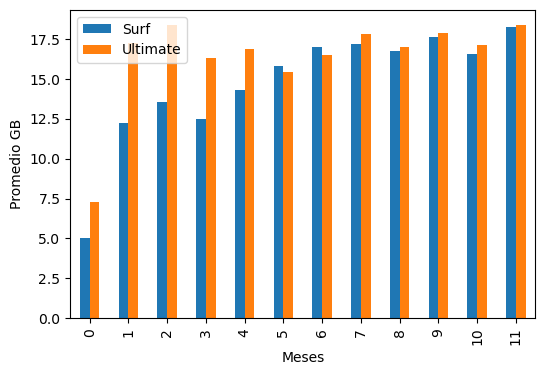

In [47]:
mean_net = monthly_users.groupby(['plan_name','month'])['total_gb'].mean().reset_index()# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

surf_net = mean_net[mean_net['plan_name'] == 'surf']
ultimate_net = mean_net[mean_net['plan_name'] == 'ultimate']

comparacion_GB = pd.DataFrame({
    'Surf': surf_net['total_gb'].values,
    'Ultimate' : ultimate_net['total_gb'].values
}) 
comparacion_GB.plot(kind='bar',figsize=[6 ,4] ,xlabel='Meses' ,ylabel='Promedio GB' )
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

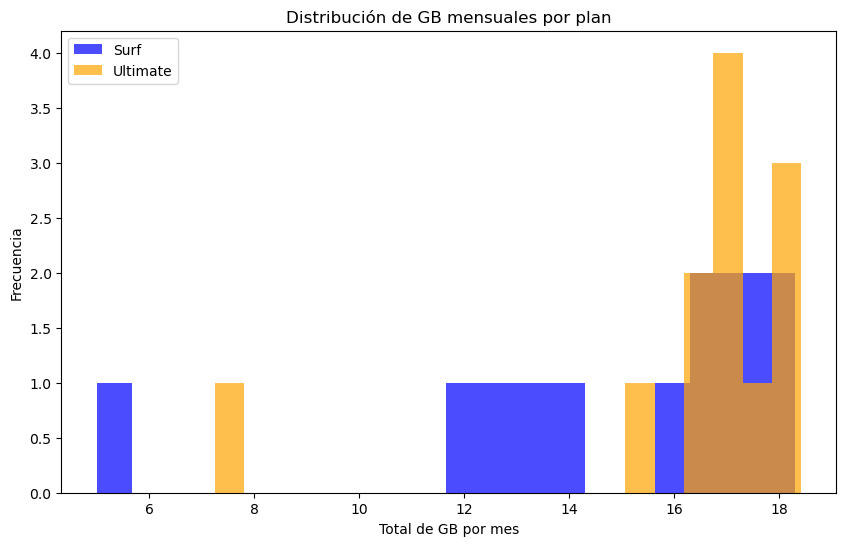

In [48]:
sum_net = monthly_users.groupby(['plan_name','month'])['total_gb'].mean().reset_index()

internet_surf = sum_net[sum_net['plan_name'] == 'surf']
internet_ultimate= sum_net[sum_net['plan_name'] == 'ultimate']

comp_sum_net = pd.DataFrame({
    'Surf': internet_surf['total_gb'].values,
    'Ultimate' : internet_ultimate['total_gb'].values
}) 

plt.figure(figsize=(10, 6))
plt.hist(internet_surf['total_gb'], bins=20, alpha=0.7, label='Surf', color='blue')
plt.hist(internet_ultimate['total_gb'], bins=20, alpha=0.7, label='Ultimate', color='orange')
plt.xlabel('Total de GB por mes')
plt.ylabel('Frecuencia')
plt.title('Distribución de GB mensuales por plan')
plt.legend()
plt.show()

In [49]:
media_surf_i = internet_surf['total_gb'].mean()# Calcula la media y la varianza de la duración mensual de llamadas.
media_ultimate_i= internet_ultimate['total_gb'].mean()

varianza_surf_i = np.var(internet_surf['total_gb'])
varianza_ultimate_i = np.var(internet_ultimate['total_gb'])
print (f'La media de Surf en Gb es {media_surf_i} y la varianza es {varianza_surf_i}')
print (f'La media de Ultimate en Gb es {media_ultimate_i} y la varianza es {varianza_ultimate_i}')

La media de Surf en Gb es 14.736846930813785 y la varianza es 12.396278970297866
La media de Ultimate en Gb es 16.360226202889844 y la varianza es 8.242135447508945


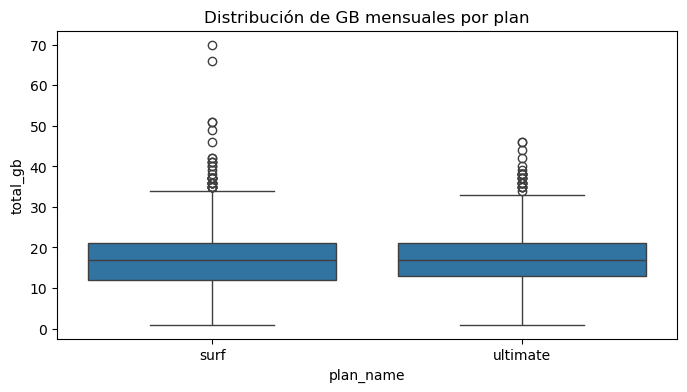

In [50]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=monthly_users, x='plan_name', y='total_gb')
plt.title('Distribución de GB mensuales por plan')
plt.show()

los usuarios del paquete "ultimate" consumen mas gb , lo podemos ver en la frecuencia, no varia en funcion del plan, varia en funcion de los meses, puede ser por las reuniones y fiesta de final de año .

## Ingreso

<Axes: xlabel='Meses', ylabel='Promedio Ganancias'>

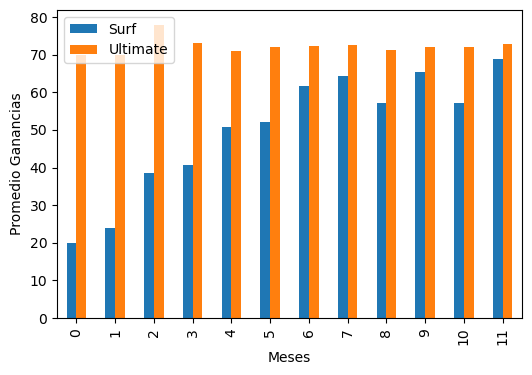

In [51]:
mean_revenue = monthly_users.groupby(['plan_name','month'])['revenue'].mean().reset_index()# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

surf_revenue = mean_revenue[mean_revenue['plan_name'] == 'surf']
ultimate_revenue = mean_revenue[mean_revenue['plan_name'] == 'ultimate']

comparacion_GB = pd.DataFrame({
    'Surf': surf_revenue['revenue'].values,
    'Ultimate' : ultimate_revenue['revenue'].values
}) 
comparacion_GB.plot(kind='bar',figsize=[6 ,4] ,xlabel='Meses' ,ylabel='Promedio Ganancias' )
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

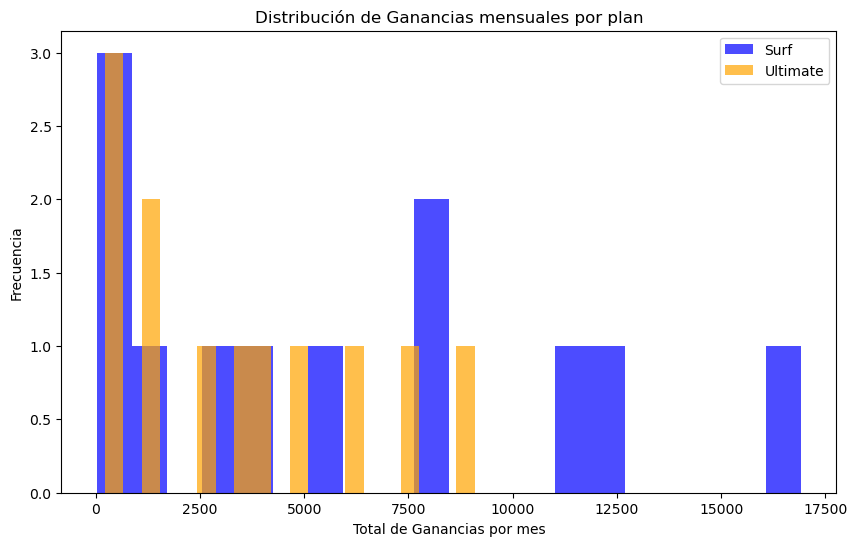

In [52]:
sum_revenue = monthly_users.groupby(['plan_name','month'])['revenue'].sum().reset_index()

surf_revenue= sum_revenue[sum_revenue['plan_name'] == 'surf']
ultimate_revenue= sum_revenue[sum_revenue['plan_name'] == 'ultimate']

comp_sum_revenue = pd.DataFrame({
    'Surf': surf_revenue['revenue'].values,
    'Ultimate' : ultimate_revenue['revenue'].values
}) 

plt.figure(figsize=(10, 6))
plt.hist(surf_revenue['revenue'], bins=20, alpha=0.7, label='Surf', color='blue')
plt.hist(ultimate_revenue['revenue'], bins=20, alpha=0.7, label='Ultimate', color='orange')
plt.xlabel('Total de Ganancias por mes')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ganancias mensuales por plan')
plt.legend()
plt.show()

In [53]:
media_surf_rev = surf_revenue['revenue'].mean()# Calcula la media y la varianza de la duración mensual de llamadas.
media_ultimate_rev = ultimate_revenue['revenue'].mean()

varianza_surf_rev = np.var(surf_revenue['revenue'])
varianza_ultimate_rev = np.var(ultimate_revenue['revenue'])
print (f'La media de Surf en Ganancias  es {media_surf_rev} y la varianza es {varianza_surf_rev}')
print (f'La media de Ultimate en Ganancias es {media_ultimate_rev} y la varianza es {varianza_ultimate_rev}')

La media de Surf en Ganancias  es 5940.890833333334 y la varianza es 28364965.52470763
La media de Ultimate en Ganancias es 3486.0 y la varianza es 8064493.5


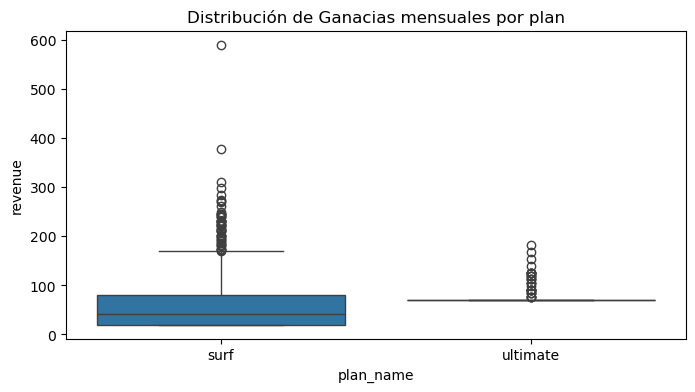

In [54]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=monthly_users, x='plan_name', y='revenue')
plt.title('Distribución de Ganacias mensuales por plan')
plt.show()

de ambos planes se saca bastante buen porcentaje de ganacias, pero el que mas nos deja ganancias es el "surf" ya que al no tener tanto "colchon" empezamos a generar mas rapido ganacias pues no ofrece tanto como el plan "ultimate".

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

In [55]:
alpha = 0.05
surf_revenue = monthly_users[monthly_users['plan_name'] == 'surf']['revenue'].dropna()
ultimate_revenue = monthly_users[monthly_users['plan_name'] == 'ultimate']['revenue'].dropna()

if len(surf_revenue) > 1 and len(ultimate_revenue) > 1:

    test_results = st.ttest_ind(surf_revenue, ultimate_revenue) 
    print("Valor p de la prueba t para comparar ingresos entre planes:", test_results.pvalue)# Prueba las hipótesis
    if test_results.pvalue < alpha:
        print("Rechazamos la hipotesis nula")
    else:
        print("No podemos rechazar la hipotesis nula")
else:
    pritn("no hay suficientes datos para realizar la prueba t.")


Valor p de la prueba t para comparar ingresos entre planes: 1.6396969942407258e-07
Rechazamos la hipotesis nula


 ## Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

In [56]:
# Prueba las hipótesis
ny_nj_users = monthly_users[monthly_users['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
ny_nj_users = ny_nj_users['revenue']

other_states = monthly_users[monthly_users['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']
other_states = other_states['revenue']

alpha = 0.05
result_1 =st.ttest_ind(ny_nj_users,other_states, equal_var=False)
print('valorp:', test_results.pvalue)
if result_1.pvalue < alpha:
    print("Rechazamos la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

valorp: 1.6396969942407258e-07
No podemos rechazar la hipotesis nula


## Conclusión general



Podemos decir que con los datos proporcionados descubrimos que realmenteay una diferencia enorme entre los ingresos de los planes y no es porque sea al azar de hecho esta probabilidad es casi nula como se puede ver en nuestra prueba de hipotesis entre los planes y para los de la region de "NY_NJ",es el caso contrario podemos tener mas seguro que en efecto los infresos provenientes de esta region son muy diferentes a los de otras regiones